## [LAB-08] 1. 워드클라우드(영문)
---
텍스트 마이닝 분야에서 사용되는 시각화 방법으로 단어의 등장 빈도를 표현한다.
### 실습용 파일 다운로드
--- 
아래 URL에 다운로드 받은 후 작업폴더/wordcloud 경로에 압축을 해제한다.

https://data.hossam.kr/data/lab08/wordcloud.zip

### #01. 준비작업
---
[1] 패키지 참조
- wordcloud 패키지 설치가 필요하다.

In [1]:
import numpy as np

#이미지 출력을 위한 jupyter 전용 기능
from IPython.display import Image

#워드클라우드 클래스
from wordcloud import WordCloud

#금지어 설정 모듈
from wordcloud import STOPWORDS

#이미지 처리 모듈 (파이썬 기본 내장)
from PIL import Image as Img

[2] 데이터 가져오기
- 텍스트 데이터가 필요하므로 txt 파일을 읽어온다.

In [4]:
with open("wordcloud/이상한나라의앨리스.txt", 'r', encoding='utf-8') as f:
    text=f.read()

# print(text)

### #02. 기본 사용 방법
---

In [5]:
# 워드 클라우드 클래스의 객체 생성 -> 생성될 가로, 세로 크기 지정(px단위)
wc = WordCloud(width=1200, height=800)

# 읽어들인 텍스트 내용을 generate 메서드에 전달
wc.generate(text)

# wc.words_ 는 산정된 각 단어별 빈도에 대한 딕셔너리이다.
wc.words_

{'said': 1.0,
 'Alice': 0.7114285714285714,
 'said Alice': 0.3314285714285714,
 'little': 0.32,
 'one': 0.3,
 'know': 0.2571428571428571,
 'Project Gutenberg': 0.24857142857142858,
 'thing': 0.23714285714285716,
 'Queen': 0.2342857142857143,
 'went': 0.23142857142857143,
 'time': 0.2257142857142857,
 'see': 0.19714285714285715,
 'head': 0.18285714285714286,
 'well': 0.18285714285714286,
 'King': 0.18285714285714286,
 'now': 0.17714285714285713,
 'way': 0.17142857142857143,
 'Mock Turtle': 0.16857142857142857,
 'began': 0.16285714285714287,
 'Hatter': 0.16285714285714287,
 'Gutenberg tm': 0.16285714285714287,
 'Gryphon': 0.15714285714285714,
 'say': 0.15428571428571428,
 'much': 0.14857142857142858,
 'quite': 0.14857142857142858,
 'must': 0.14857142857142858,
 'first': 0.1457142857142857,
 'come': 0.1457142857142857,
 'go': 0.1457142857142857,
 'never': 0.14,
 'thought': 0.14,
 'think': 0.13714285714285715,
 'voice': 0.13428571428571429,
 'looked': 0.13428571428571429,
 'work': 0.131428

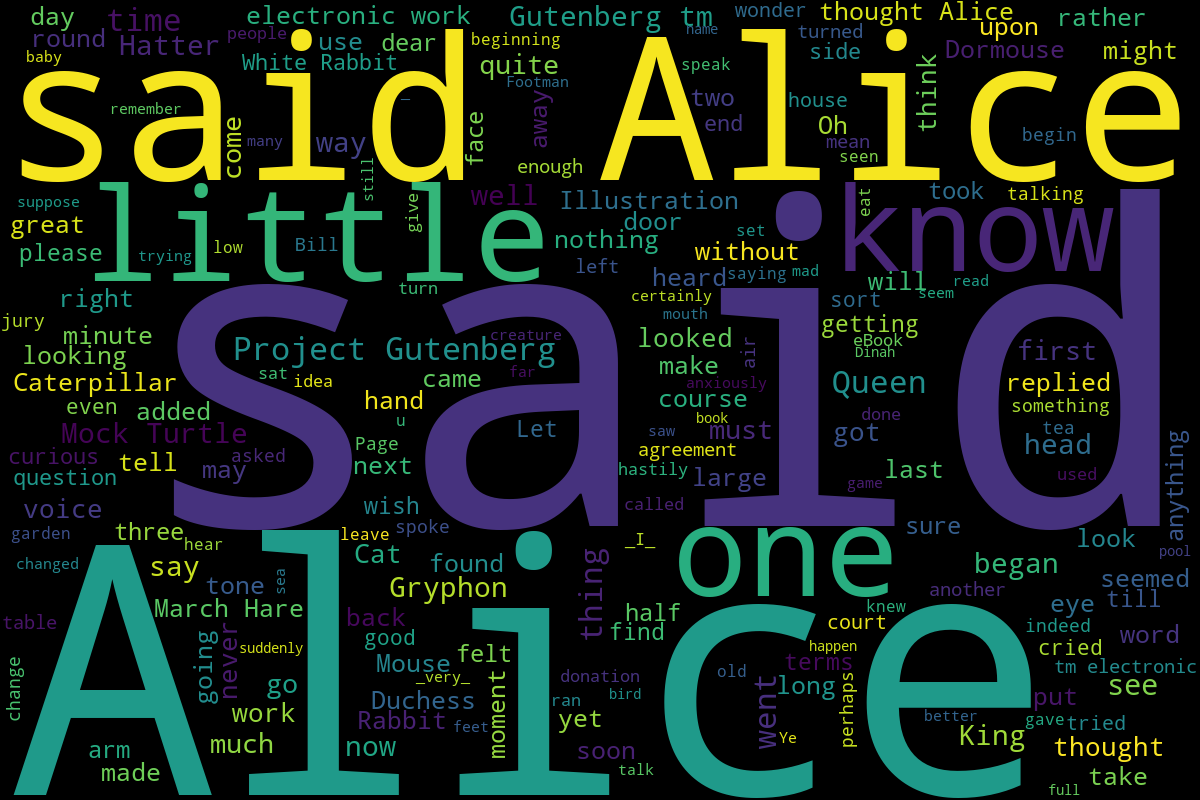

In [6]:
# 그래픽 표시 데이터를 단어 빈도수에 대한 딕셔너리로 지정
wc.to_file("simple.png")
Image("simple.png")

### #03. WordCloud 객체의 옵션
---
[1] 금지어 설정

In [8]:
# 금지어 설정 --> 필요한 만큼 add()함수를 호출하여 추가
ignore = set(STOPWORDS)
ignore.add("said")
ignore.add("Alice")

color = "#FFFFFF"

[2] 마스크 이미지 설정

In [9]:
img = Img.open("wordcloud/앨리스배경.png")
iarr=np.array(img)
iarr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(900, 900), dtype=uint8)

[3] 워드 클라우드 확인

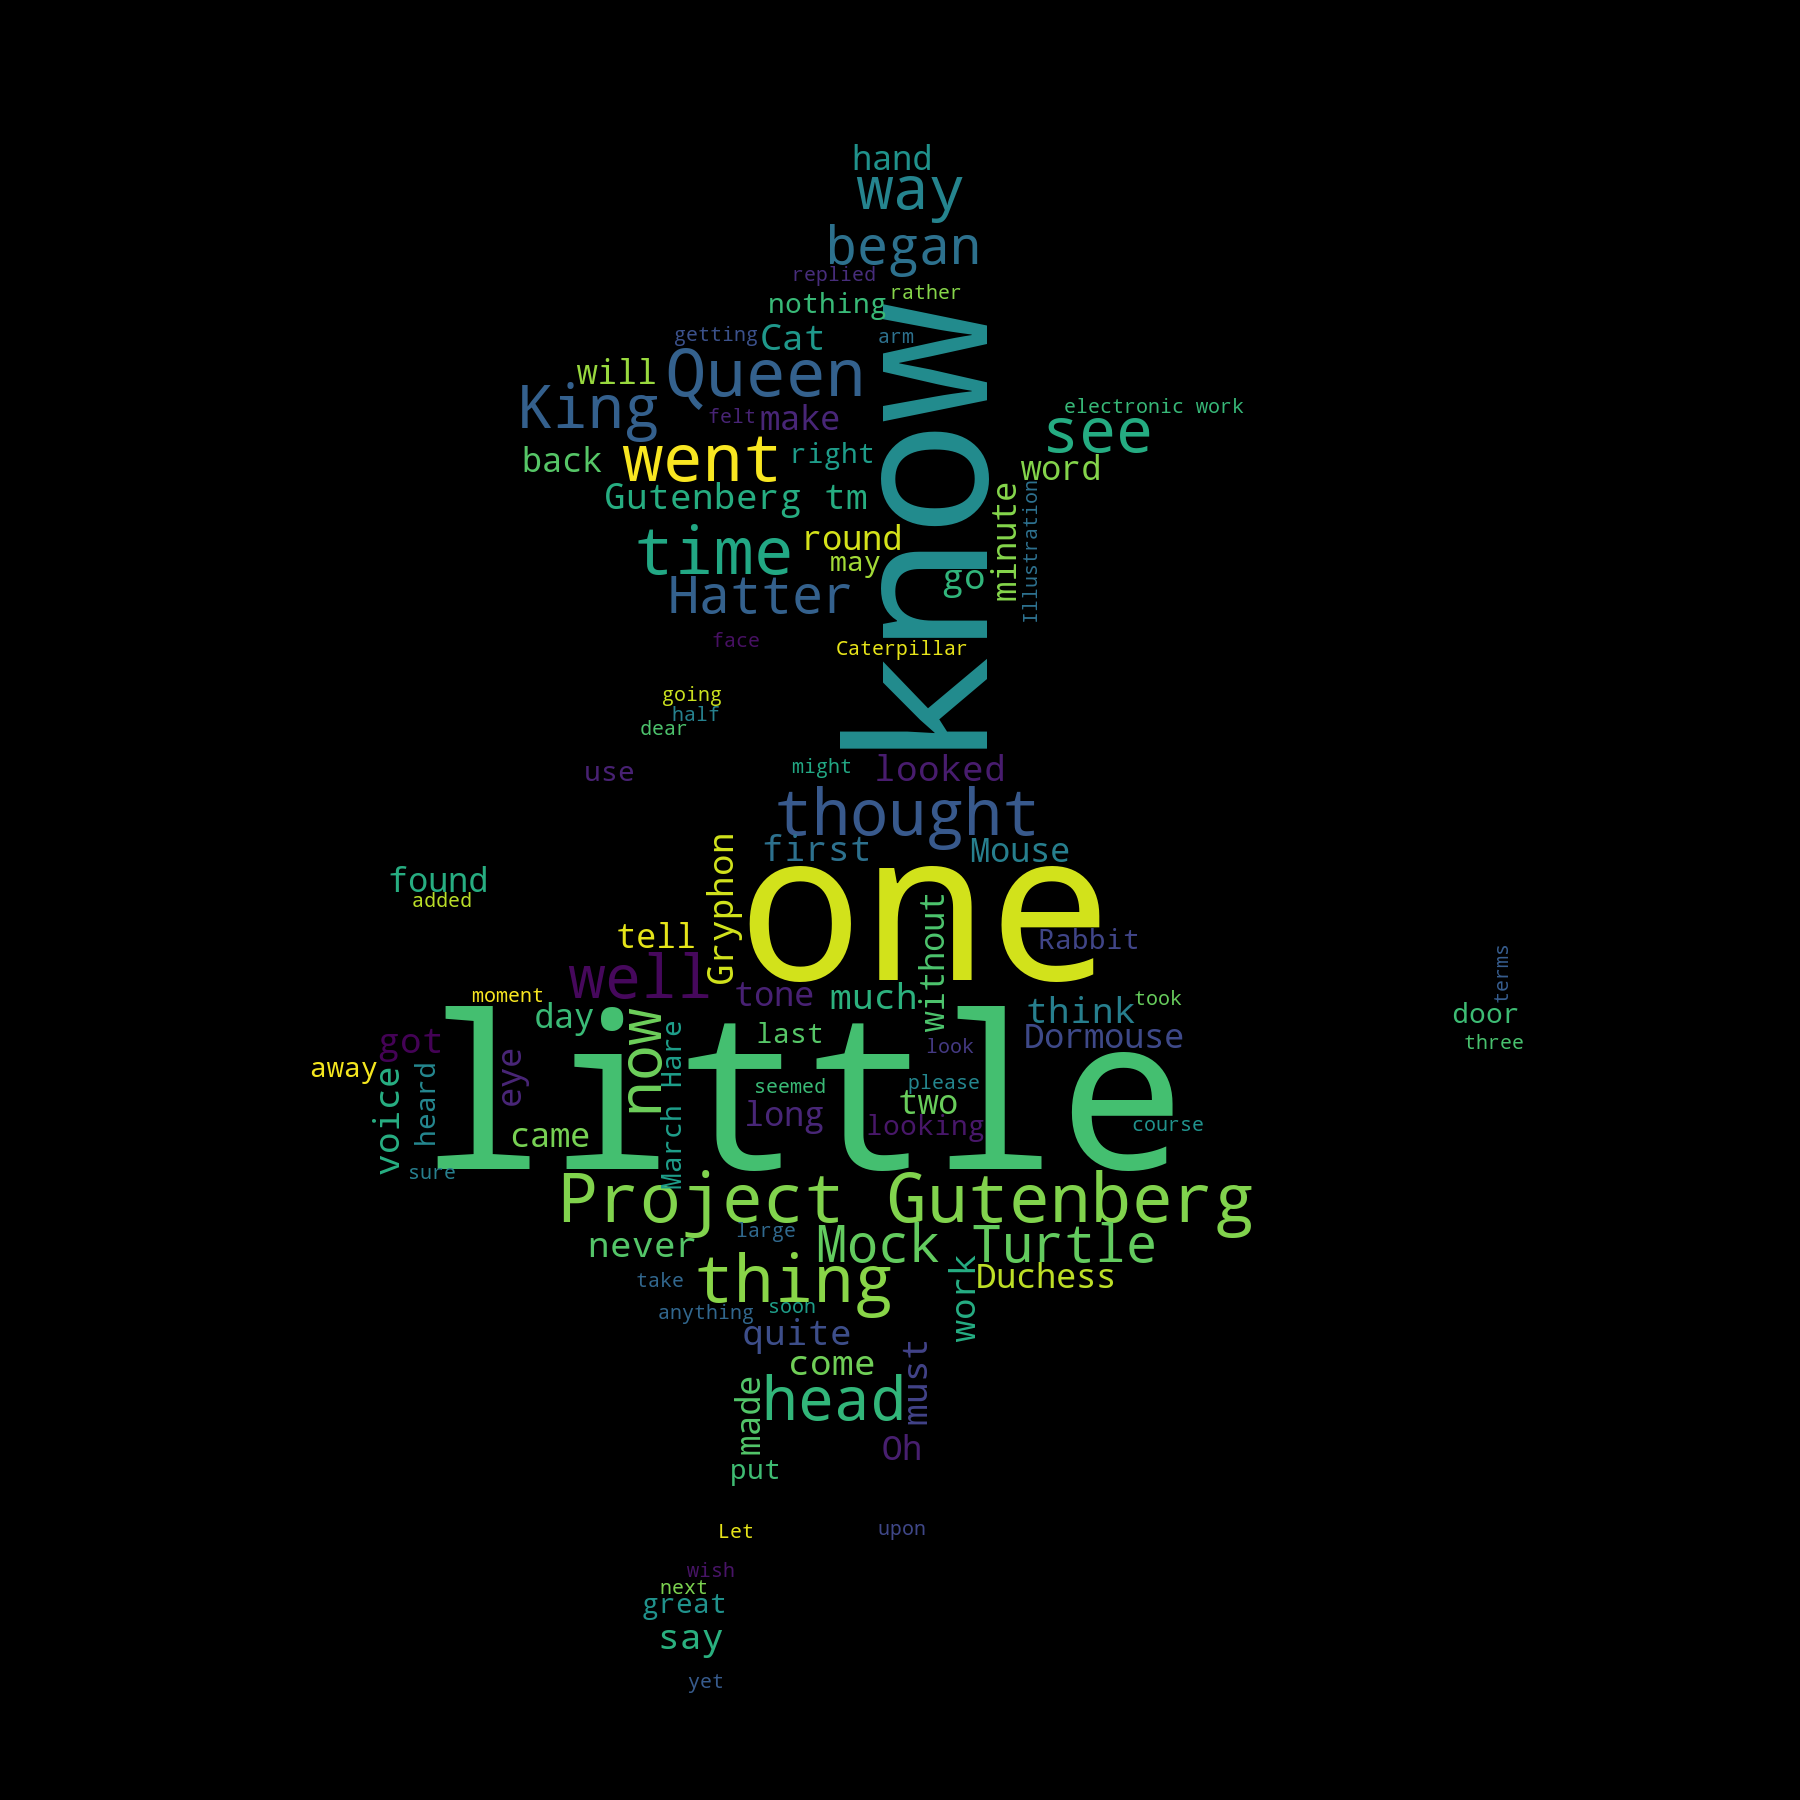

In [10]:
wc = WordCloud(width=600, height=1200,
               max_font_size=150,       #최대 글자 크기
               scale=2.0,               #이미지 스케일(dpi=200과 동일)
               max_words=100,           #워드 클라우드에 담을 최대 단어 수
               stopwords=ignore,        #금지어 목록
               mask=iarr                #마스크로 사용할 이미지 배열
            )               
wc.generate(text)
wc.to_file("options.png")
Image("options.png")

### #03. 칼라 팔레트 사용
---
colormap파라미터를 사용하면 pyplot에서 제공하는 칼라 팔레트를 적용할 수 있다.

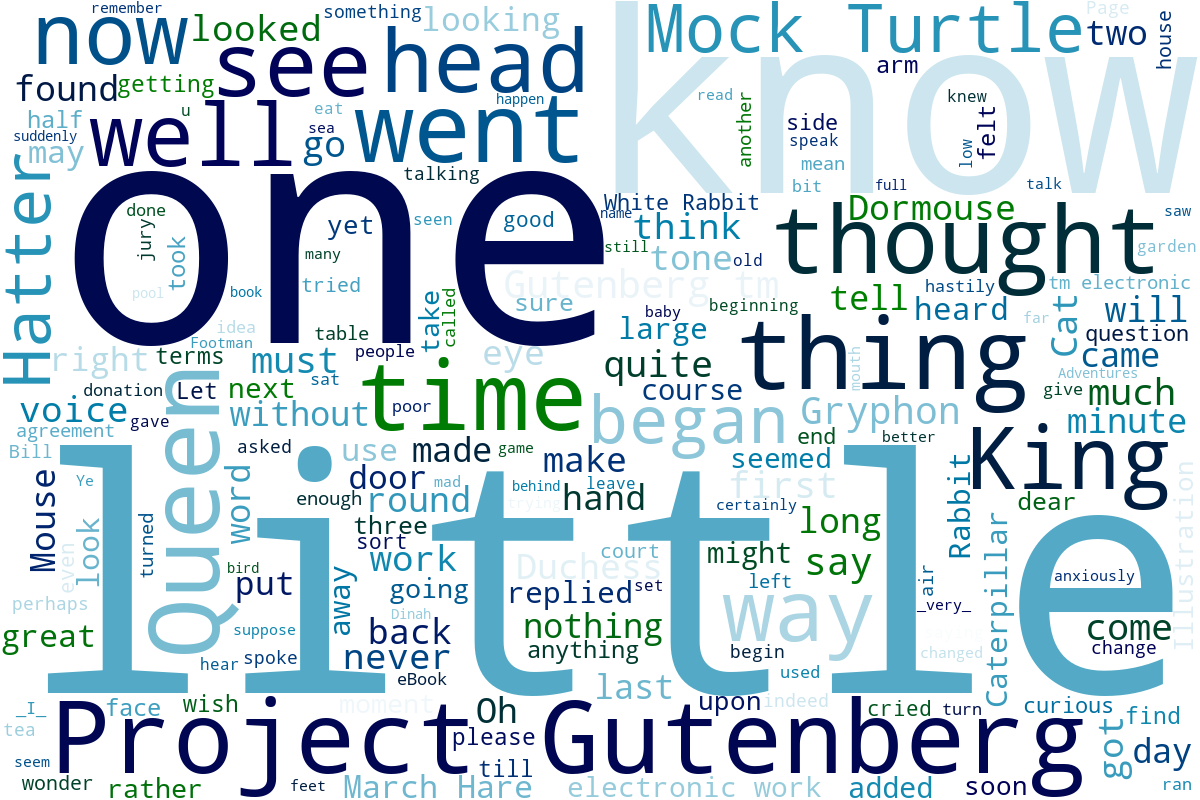

In [11]:
# background_color 파라미터를 통해 배경색상 설정 가능
wc = WordCloud(width=1200, height=800, stopwords=ignore,
               background_color="#FFFFFF", colormap="ocean")
wc.generate(text)
wc.to_file("colormap.png")
Image(filename='colormap.png')